In [1]:
from tidy_data import df_speeches_cleanned

df_cleanned = df_speeches_cleanned.copy()


In [2]:
#df_cleanned[df_cleanned["date"] > "2015.01.01" & df_cleanned["party"] == "Democratic"]
df_cleanned[df_cleanned["party"] != "Democratic"].sort_values(by='date').iloc[45]["text"]
#df_cleanned
#df_cleanned[df_cleanned["speaker"] == "Donald Trump"]

'  Thank you all. Mr. Secretary—I\'m really pleased to have Norman Mineta in my Cabinet. He is a really good guy. And I thank you for your service, friend, and thank you for being here to share in this testimony to what technology is going to do for our country to make it a better place for all of us to live. First of all, happy Earth Day to you. It\'s a good place to spend Earth Day, here in California. I got to spend the first part of my day riding a mountain bike in Napa Valley. It\'s a good place to ride—[laughter]—a little hillier than I would have liked. [Laughter] But it\'s a spectacular way to commune with nature. And I really appreciate you coming. I want all of us to understand that we have a serious responsibility to be good stewards of our land. And this is a day we unite together to recommit ourselves to be good stewards of our land. I appreciate the good stewardship—commitment to good stewardship at the heart of the California Fuel Cell Partnership. I bet a lot of our cit

In [83]:
import re
text = "Thank you all. Mr. Secretary—I\'m really pleased God bless. NOTE: spoke at 2:41 p.m. In his remarks, he referred to Julia Harlow, wife of Rep. John T. Doolittle of California; and Gov. Arnold Schwarzenegger of California. George W. Bush, Remarks at the California Fuel Cell Partnership in West Sacramento, California   https://www.presidency.ucsb.edu/node/215250 Terms of Service|Privacy|Accessibility "
#print(text)
cleaned_text = re.sub(r' NOTE:.*$', '', text)
print(cleaned_text) # drop numbers


Thank you all. Mr. Secretary—I'm really pleased God bless.


In [1]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('data/us_pres_climate_speeches_more_climate.db')

# Create a cursor object
cursor = conn.cursor()

# Query to get the table names
query_tables = "SELECT name FROM sqlite_master WHERE type='table';"
cursor.execute(query_tables)

# Fetch all table names
table_names = cursor.fetchall()

# Print the available tables
print("Available tables:", table_names)

# Close the database connection
conn.close()


Available tables: [('us_pres_climate_speeches_more_climate',)]


In [11]:
#Use textblob in python: https://www.kaggle.com/code/blessondensil294/beginner-nlp-product-sentiment-analysis-textblob 

import pandas as pd
from textblob import TextBlob

df_sentiment_blob = pd.DataFrame(columns=['date', 'speaker','party','text', 'sentiment', 'subjectivity'])

# temporary list to store the dictionaries
result_data = []

# Loop through the df
for index, row in df_cleanned.iterrows():
    # Get data from df columns
    text = row['text']
    date = row['date']
    party = row['party']
    speaker = row['speaker']

    # Get the sentiment and subjectivity
    sentiment, subjectivity = TextBlob(text).sentiment

    # Append the results to the list
    result_data.append({
        'date': date,
        'speaker': speaker,
        'party': party,
        'speech': text,
        'sentiment': sentiment,
        'subjectivity': subjectivity
    })

# Create a DataFrame from the list of dictionaries
df_sentiment_blob = pd.DataFrame(result_data)


C:\Users\augus\AppData\Local\Temp\ipykernel_7312\91385861.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  scatter_plot.set_xticklabels(scatter_plot.get_xticklabels(), rotation=45, horizontalalignment='right')


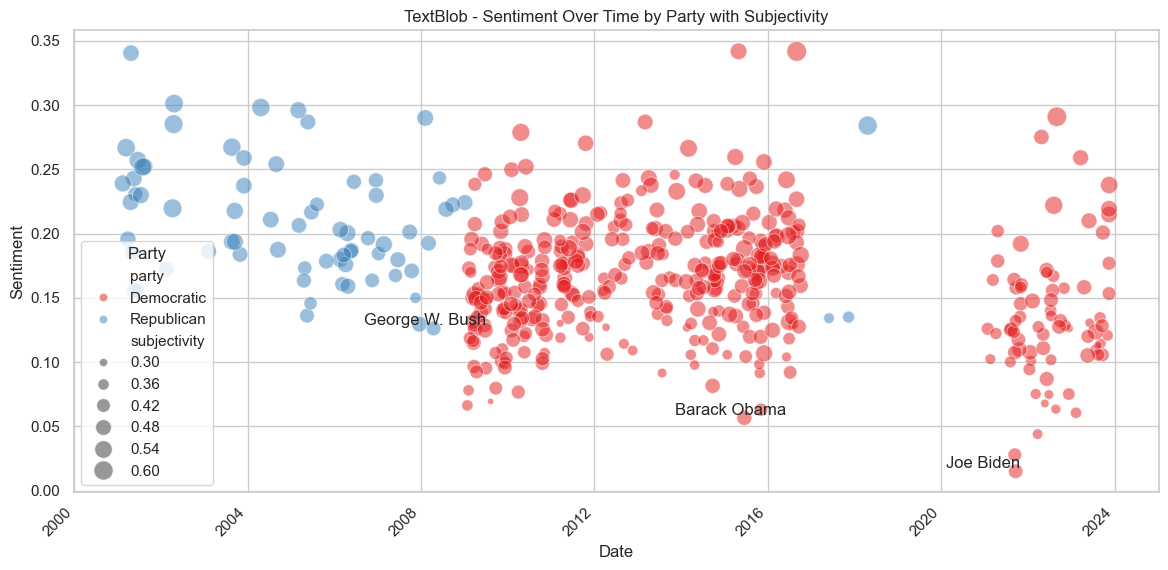

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot style
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(14, 6))
scatter_plot = sns.scatterplot(
    data=df_sentiment_blob,
    x='date',
    y='sentiment',
    hue='party',
    palette='Set1',
    size='subjectivity',  
    sizes=(20, 200), 
    alpha=0.5
)

# Set labels and title
plt.title('TextBlob - Sentiment Over Time by Party with Subjectivity')
plt.xlabel('Date')
plt.ylabel('Sentiment')

# legend
plt.legend(title='Party', loc='best')

# date formatting
scatter_plot.set_xticklabels(scatter_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# # Include the speaker name in the chart
# for speaker, group in df_sentiment_blob.groupby('speaker'):
#     mean_date = group['date'].mean()
#     mean_sentiment = group['sentiment'].mean()
#     plt.annotate(speaker,
#                  (mean_date, mean_sentiment),
#                  textcoords="offset points",
#                  xytext=(-50, -100),
#                  va='bottom')

for speaker, group in df_sentiment_blob.groupby('speaker'):
    lowest_sentiment_row = group.loc[group['sentiment'].idxmin()]  # Find row with lowest sentiment
    plt.annotate(speaker,
                 (lowest_sentiment_row['date'], lowest_sentiment_row['sentiment']),
                 textcoords="offset points",
                 xytext=(-50, 0),
                 va='bottom')

plt.show()


In [9]:
# What are the lowest sentiment speeches?

# Sort the DataFrame by 'sentiment' in ascending order
df_lowest_sentiment_blob = df_sentiment_blob.sort_values(by='sentiment')


# Create a string to get the info about the lowest sentiment speeches
result_phrase = ""
for index, row in lowest_sentiment_df.head(5).iterrows(): # 5 lowest sentiment speeches
    result_phrase += f"{row['speaker']} from {row['party']} gave a speech on {row['date']} with sentiment {row['sentiment']:.4f} and subjectivity {row['subjectivity']:.4f}. The speech was:\n{row['speech']}\n\n"

# Display the result phrase
print(result_phrase)


Joe Biden from Democratic gave a speech on 2021-09-20 00:00:00 with sentiment 0.0150 and subjectivity 0.4444. The speech was:
  Over the past few weeks, I have traveled across the country to see firsthand the devastating human and economic toll of extreme weather exacerbated by climate change. I have walked down streets in Louisiana, New Jersey, and New York, where deadly storms have blown apart the lives of working families, wiping homes and businesses off the map. I've sat with firefighters in Boise, Idaho, and surveyed the damage of the Caldor Fire in Northern California, just one of dozens of large wildfires that together have burned more than 5 million acres of American land so far this year. Communities that over 100 million people—one in three Americans—call home have been struck by extreme weather events in the last few months alone. This is a blinking code red for our Nation. And while we have all seen the graphic and heart-wrenching images of superstorms, wildfires, and flood

In [10]:

# Sort the DataFrame by 'sentiment' in descendign order
df_highest_sentiment_blob = df_sentiment_blob.sort_values(by='sentiment', ascending=False)

# Create a string to get the info about the highest sentiment speeches
result_phrase = ""
for index, row in highest_sentiment_df.head(5).iterrows(): # 5 highest sentiment speeches
    result_phrase += f"{row['speaker']} from {row['party']} gave a speech on {row['date']} with sentiment {row['sentiment']:.4f} and subjectivity {row['subjectivity']:.4f}. The speech was:\n{row['speech']}\n\n"

# Display the result phrase
print(result_phrase)



Barack Obama from Democratic gave a speech on 2015-04-30 00:00:00 with sentiment 0.3418 and subjectivity 0.5129. The speech was:
  It is a great pleasure to welcome some outstanding legislators and advocates on behalf of an issue that should always be bipartisan, and that is, making sure that we have the most energy-efficient economy in the world. We've made great strides since the beginning of my administration on everything from doubling fuel efficiency standards on cars to incentivizing smarter policies when we build buildings so that they're not wasting as much energy. And thanks to the leadership of folks like Senators Shaheen and Portman and Bennet and Representative Welch and other folks who are here, what we've seen is a coming together of Republicans and Democrats who are going to facilitate us being much smarter in terms of building buildings, how we use energy. And as a consequence, we're going to save money for consumers, we're going to save money for businesses, and we're 